<a href="https://colab.research.google.com/github/vjbarayuga/zyberlab-activity-2/blob/main/time_series_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:

df_sample_sub = pd.read_csv('/content/drive/MyDrive/ZYBERLAB-Data_Science_Bootcamp/DATASET/sample_submission.csv')
df_stores = pd.read_csv('/content/drive/MyDrive/ZYBERLAB-Data_Science_Bootcamp/DATASET/stores.csv')
df_trans = pd.read_csv('/content/drive/MyDrive/ZYBERLAB-Data_Science_Bootcamp/DATASET/transactions.csv')
df_holi = pd.read_csv('/content/drive/MyDrive/ZYBERLAB-Data_Science_Bootcamp/DATASET/holidays_events.csv')
df_oil = pd.read_csv('/content/drive/MyDrive/ZYBERLAB-Data_Science_Bootcamp/DATASET/oil.csv')

In [6]:
df_train = pd.read_csv('/content/drive/MyDrive/ZYBERLAB-Data_Science_Bootcamp/DATASET/train.csv',parse_dates=['date'])
df_test = pd.read_csv('/content/drive/MyDrive/ZYBERLAB-Data_Science_Bootcamp/DATASET/test.csv',parse_dates=['date'])

#**EXPLORATORY DATA ANALYSIS**

In [7]:
# Sample Submission data top 5
df_sample_sub.head(5)

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [8]:
# Sample Submission data from bottom 5
df_sample_sub.tail(5)

,id,sales
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0
28511,3029399,0.0


#STORES DATA

In [9]:
# The stores data - top 5
df_stores.head(5)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [10]:
# The stores data from bottom 5
df_stores.tail(5)

,store_nbr,city,state,type,cluster
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


In [11]:
# Checking Null values
df_stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

#TRANSACTIONS DATA

In [12]:
# The transaction data - top 5
df_trans.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [13]:
# The transactions data - bottom 5
df_trans.tail(5)

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [14]:
# Checking Null values
df_trans.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

##HOLIDAYS EVENTS DATA FRAME

In [15]:
# Holidays Event data - top 5
df_holi.head(5)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [16]:
# Holidays Event data - bottom 5
df_holi.tail(5)

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [17]:
# Checking Null values
df_holi.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

#**OIL DATA**

In [18]:
# The oil data - top 5
df_oil.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [19]:
# The oil data - bottom 5
df_oil.tail(5)

,date,dcoilwtico
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


In [20]:
# Checking Null values
df_oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

# **TRAIN DATA**

In [21]:
# The Train data - top 5
df_train.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [22]:
# The Train data - bottom 5
df_train.tail(5)

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [23]:
# Checking Null values
df_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

#**TEST DATA**

In [24]:
# The Test data - top 5
df_test.head(5)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [25]:
# The Test data - bottom 5
df_test.tail(5)

,id,date,store_nbr,family,onpromotion
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
28511,3029399,2017-08-31,9,SEAFOOD,0


In [26]:
# Checking Null values
df_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

#**CHECKING OF DATA TYPES IN ALL DATA FRAMES**

In [27]:
# Sample Submission data types
df_sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [28]:
# Stores data types
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [29]:
# Transaction data types
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [30]:
# Holidays event data types
df_holi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [31]:
# Oil data types
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [32]:
# Train data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [33]:
# Test data types
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [34]:
df_test.nunique()

id             28512
date              16
store_nbr         54
family            33
onpromotion      212
dtype: int64

#**CHECKING THE SHAPE OF ALL DATA FRAMES**

In [35]:
# Checking shapes for all datasets
print(df_sample_sub.shape, df_stores.shape, df_trans.shape, df_oil.shape,df_train.shape, df_test.shape)

(28512, 2) (54, 5) (83488, 3) (1218, 2) (3000888, 6) (28512, 5)


#**DATA ISSUE OBSERVED**

43 null values in oil data before merge

#**SOLUTION TO ISSUE**

1. A POSSIBLE SIMPLE IMPUTER MAY BE APPLIED OR OTHER IMPUTING TECHNIQUES

#**CONVERTING DATE COLUMN TO DATE TIME FORMAT, LIST OF DATA FRAMES TO BE CONVERTED, LOOPING THROUGH AND CONVERT DATE COLUMN INTO DATE TIME FORMAT

In [36]:
# Function to convert date column to datetime format
def to_dateTime(df):
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'])

# List of dataframes to convert
dataframes = [df_trans, df_holi, df_oil, df_train, df_test]

# Loop through dataframes and convert 'date' column to datetime format
for df in dataframes:
    to_dateTime(df)

In [37]:
# Checking the datetime conversion on Train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


# Merge all datasets for further EDA

In [38]:
# combine the datasets on common columns

merged_data = pd.merge(df_train, df_trans, on=['date', 'store_nbr'])

In [39]:
# Merge Holiday data to previous merged data on date column
merged_data2 = pd.merge(merged_data, df_holi, on='date')

In [40]:
# Merge Oil data to previous merged data on date column
merged_data3 = pd.merge(merged_data2, df_oil, on='date')

In [41]:
# Merge Store data to previous merged data on store_nbr column

merged_data4 = pd.merge(merged_data3, df_stores, on='store_nbr')

In [42]:
# Preview Merged data
merged_data4.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1


In [43]:
# Rename columns using the rename method
new_merged_data = merged_data4.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})

In [44]:
# Preview of new merged data - top 10
new_merged_data.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1


In [47]:
# Preview of new merged data - bottom 10
new_merged_data.tail()

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
322042,3000685,2017-08-15,52,POULTRY,397.340,0,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11
322043,3000686,2017-08-15,52,PREPARED FOODS,104.418,0,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11
322044,3000687,2017-08-15,52,PRODUCE,3803.368,8,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11
322045,3000688,2017-08-15,52,SCHOOL AND OFFICE SUPPLIES,17.000,0,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11
322046,3000689,2017-08-15,52,SEAFOOD,7.000,0,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11


In [49]:
# Datatypes of new merged data
new_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  int64         
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  int64         
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  int64         
 6   transactions  322047 non-null  int64         
 7   holiday_type  322047 non-null  object        
 8   locale        322047 non-null  object        
 9   locale_name   322047 non-null  object        
 10  description   322047 non-null  object        
 11  transferred   322047 non-null  bool          
 12  dcoilwtico    300003 non-null  float64       
 13  city          322047 non-null  object        
 14  state         322047 non-null  object        
 15  store_type    322

In [50]:
# Inspect data for null values
new_merged_data.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
transactions        0
holiday_type        0
locale              0
locale_name         0
description         0
transferred         0
dcoilwtico      22044
city                0
state               0
store_type          0
cluster             0
dtype: int64

In [51]:
# Preview of shape of new merged data
new_merged_data.shape

(322047, 17)

In [52]:
#display random sample of 5 rows
new_merged_data.sample(5, random_state = 0)

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
306623,2181590,2016-05-12,20,PET SUPPLIES,1.000,0,1399,Event,National,Ecuador,Terremoto Manabi+26,False,46.64,Quito,Pichincha,B,6
220583,2155769,2016-04-27,46,FROZEN FOODS,203.789,5,2783,Event,National,Ecuador,Terremoto Manabi+11,False,45.29,Quito,Pichincha,A,14
99610,2256622,2016-06-23,26,HOME AND KITCHEN II,0.000,0,451,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False,49.34,Guayaquil,Guayas,D,10
262757,987074,2014-07-09,54,FROZEN FOODS,18.000,0,794,Event,National,Ecuador,Mundial de futbol Brasil: Semifinales,False,102.93,El Carmen,Manabi,C,3
211484,977843,2014-07-04,45,LAWN AND GARDEN,5.000,0,3684,Event,National,Ecuador,Mundial de futbol Brasil: Cuartos de Final,False,NaN,Quito,Pichincha,A,11


In [53]:
# New datatypes after changing date datatype as datetime
new_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  int64         
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  int64         
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  int64         
 6   transactions  322047 non-null  int64         
 7   holiday_type  322047 non-null  object        
 8   locale        322047 non-null  object        
 9   locale_name   322047 non-null  object        
 10  description   322047 non-null  object        
 11  transferred   322047 non-null  bool          
 12  dcoilwtico    300003 non-null  float64       
 13  city          322047 non-null  object        
 14  state         322047 non-null  object        
 15  store_type    322

In [54]:
# # Generate summary statistics for numerical columns in the DataFrame
new_merged_data.describe()

,id,store_nbr,sales,onpromotion,transactions,dcoilwtico,cluster
count,3.220470e+05,322047.000000,322047.000000,322047.000000,322047.000000,300003.000000,322047.000000
mean,1.682979e+06,26.994672,406.383452,3.727136,1734.117840,64.077912,8.531202
std,7.862493e+05,15.595174,1246.881240,15.512095,1050.335018,25.147682,4.713809
min,5.610000e+02,1.000000,0.000000,0.000000,54.000000,27.960000,1.000000
25%,1.010616e+06,13.000000,1.000000,0.000000,1030.000000,44.660000,4.000000
50%,1.842406e+06,27.000000,19.000000,0.000000,1409.000000,51.440000,9.000000
75%,2.209556e+06,40.000000,241.260505,1.000000,2148.000000,94.740000,13.000000
max,3.000887e+06,54.000000,124717.000000,716.000000,8359.000000,107.950000,17.000000


In [55]:
# Finding duplicated valueS
new_merged_data.duplicated().sum()

0

In [56]:
# Convert dataset to CSV
new_merged_data.to_csv('new_merged_data.csv', index=False)

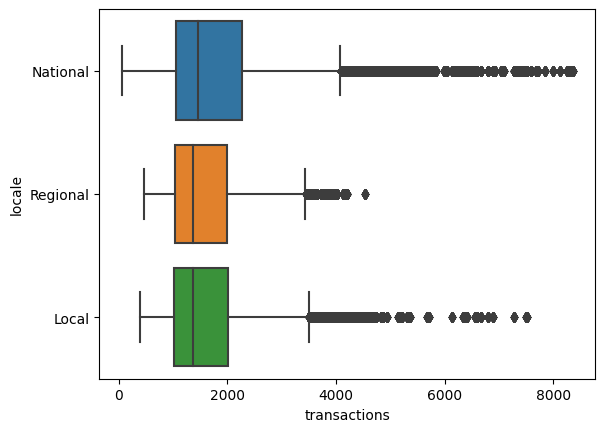

In [57]:
# Create a boxplot of the 'transactions' column grouped by 'locale'
sns.boxplot(x='transactions', y='locale', data=new_merged_data)

# Show the plot
plt.show()

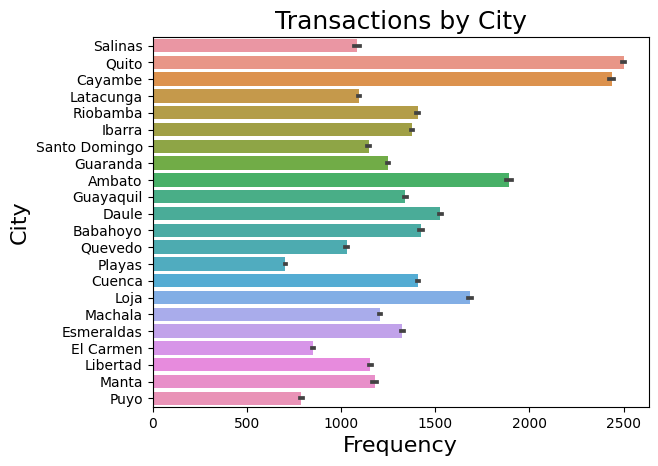

In [58]:
# Create the boxplot using the Seaborn library
sns.barplot(x='transactions', y='city', data=new_merged_data)


width=0.5,  # Adjust the width of the boxes
fliersize=3, # Adjust the size of the outliers
showmeans=True, # Show the mean value
meanline=True, # Show a line for the mean
notch=True, # Make the boxes "notched"

# Add a title and labels for the x and y axis
plt.title("Transactions by City", fontsize=18)
plt.xlabel("Frequency", fontsize=16)
plt.ylabel("City", fontsize=16)

# Show the plot
plt.show()

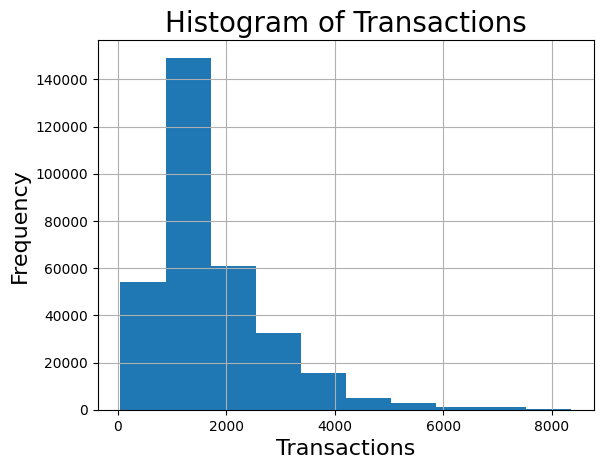

In [59]:
# Create a histogram of the 'transactions' column
new_merged_data.transactions.hist()

# Add labels to the x-axis, y-axis, and title
plt.xlabel('Transactions', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Histogram of Transactions', fontsize=20)

# Show the plot
plt.show()

In [60]:
# create a dataframe with numerical columns only
numerical_df = new_merged_data.select_dtypes(include=['float64', 'int64'])

# calculate the correlation matrix
corr_matrix = numerical_df.corr()

# display the correlation matrix
print(corr_matrix)

                    id  store_nbr     sales  onpromotion  transactions  \
id            1.000000   0.013728  0.061237     0.181707     -0.018267   
store_nbr     0.013728   1.000000  0.051349     0.025992      0.171946   
sales         0.061237   0.051349  1.000000     0.418029      0.203691   
onpromotion   0.181707   0.025992  0.418029     1.000000      0.038163   
transactions -0.018267   0.171946  0.203691     0.038163      1.000000   
dcoilwtico   -0.836786  -0.010286 -0.062568    -0.133799     -0.017944   
cluster      -0.018880  -0.075667  0.033868     0.005895      0.188876   

              dcoilwtico   cluster  
id             -0.836786 -0.018880  
store_nbr      -0.010286 -0.075667  
sales          -0.062568  0.033868  
onpromotion    -0.133799  0.005895  
transactions   -0.017944  0.188876  
dcoilwtico      1.000000  0.021655  
cluster         0.021655  1.000000  


In [61]:
# Check for missing values
if df_train.isnull().values.any():
  print("The dataset is not complete. There are missing values.")

# Check for missing dates in a time-series dataset
if not df_train.index.is_unique:
  print("The dataset is not complete. There are duplicate dates.")
else:
  print("The dataset is complete.")


The dataset is complete.


In [63]:
#display random sample of 5 rows
df_stores.sample(5, random_state = 0)

,store_nbr,city,state,type,cluster
53,54,El Carmen,Manabi,C,3
33,34,Guayaquil,Guayas,B,6
48,49,Quito,Pichincha,A,11
26,27,Daule,Guayas,D,1
11,12,Latacunga,Cotopaxi,C,15


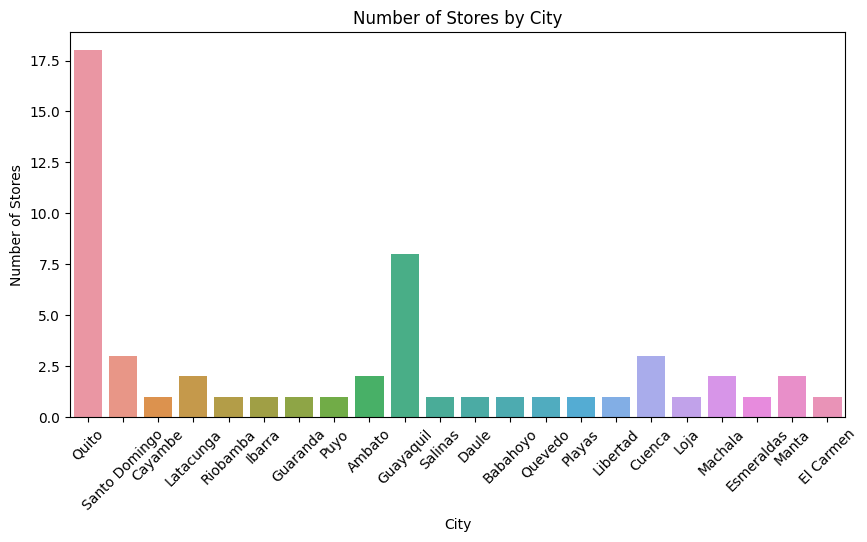

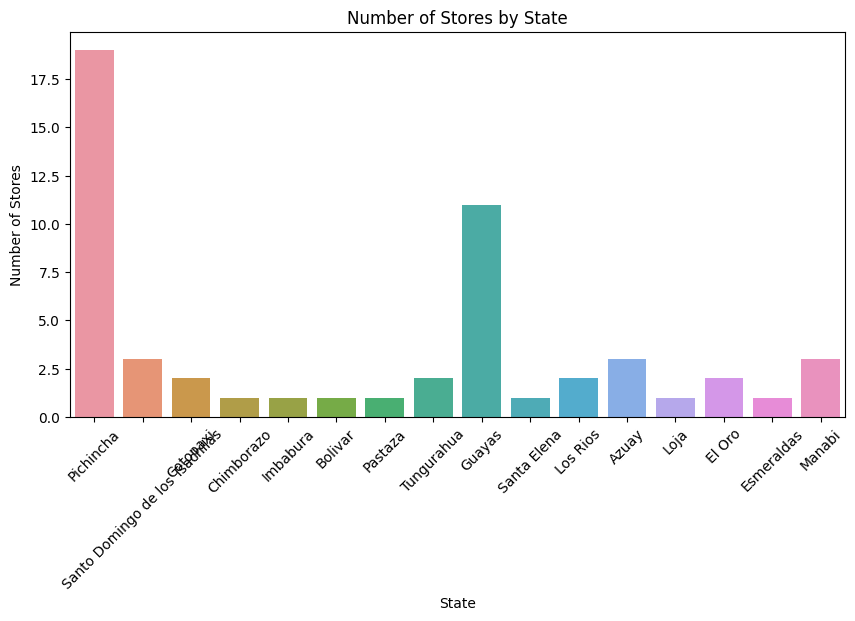

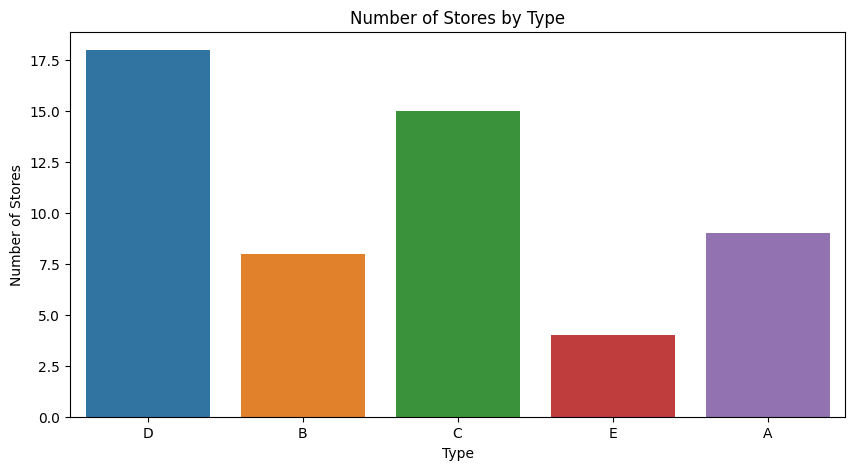

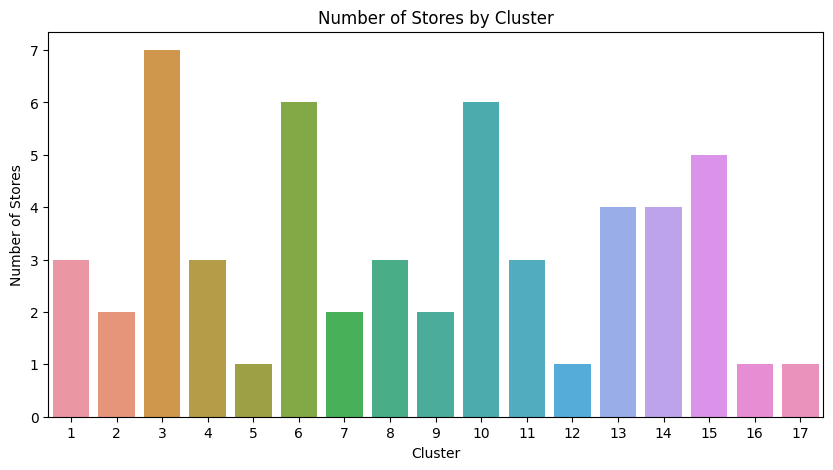

In [64]:

# Plot the number of stores by city
plt.figure(figsize=(10, 5))
sns.countplot(x='city', data=df_stores)

# Add title and labels
plt.title("Number of Stores by City")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.ylabel("Number of Stores")

# Show the plot
plt.show()

# Plot the number of stores by state
plt.figure(figsize=(10, 5))
sns.countplot(x='state', data=df_stores)

# Add title and labels
plt.title("Number of Stores by State")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.ylabel("Number of Stores")

# Show the plot
plt.show()

# Plot the number of stores by type
plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=df_stores)

# Add title and labels
plt.title("Number of Stores by Type")
plt.xlabel("Type")
plt.ylabel("Number of Stores")

# Show the plot
plt.show()

# Plot the number of stores by cluster
plt.figure(figsize=(10, 5))
sns.countplot(x='cluster', data=df_stores)

# Add title and labels
plt.title("Number of Stores by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Stores")

# Show the plot
plt.show()


<ipython-input-65-9edf7c386331>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_year = df_train_copy.groupby('year').sum()


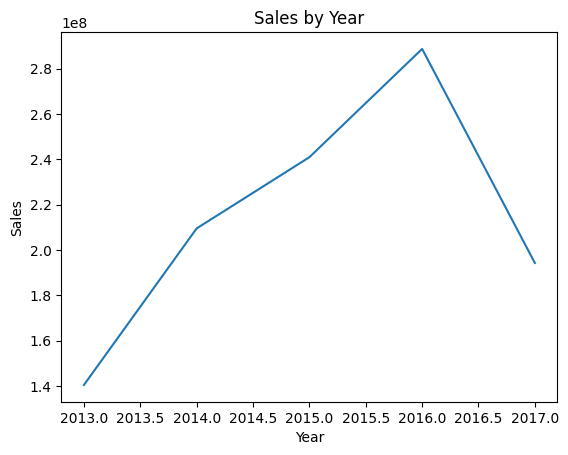

<ipython-input-65-9edf7c386331>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_month = df_train_copy.groupby('month').sum()


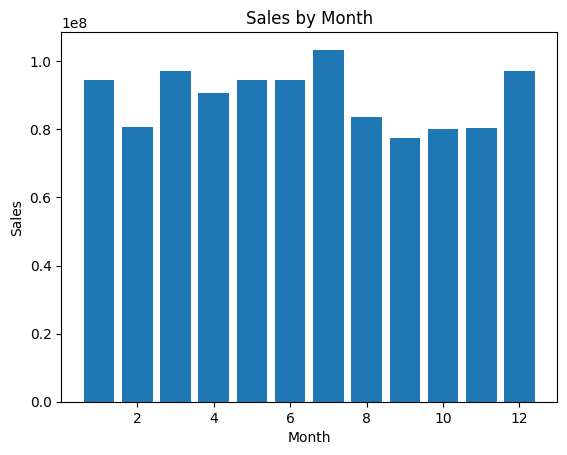

<ipython-input-65-9edf7c386331>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_quarter = df_train_copy.groupby('quarter').sum()


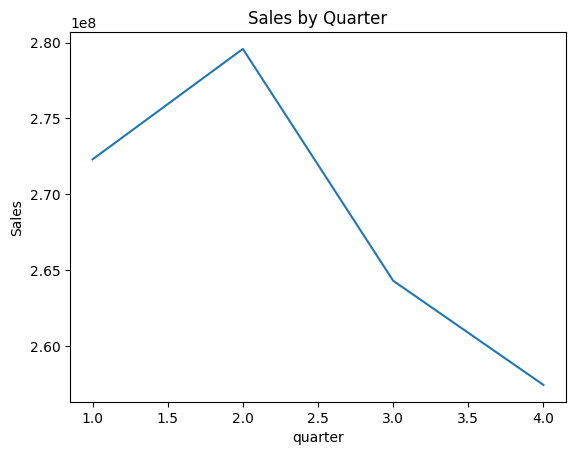

In [65]:
# create a copy of the dataframe
df_train_copy = df_train.copy()


# extract year, quarter, month, day, and weekday information from the date column
df_train_copy['year'] = df_train_copy['date'].dt.year
df_train_copy['quarter'] = df_train_copy['date'].dt.quarter
df_train_copy['month'] = df_train_copy['date'].dt.month
df_train_copy['day'] = df_train_copy['date'].dt.day
df_train_copy['weekday'] = df_train_copy['date'].dt.weekday

# group sales data by year
grouped_by_year = df_train_copy.groupby('year').sum()

# plot the aggregated sales data by year
plt.plot(grouped_by_year.index, grouped_by_year['sales'])
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales by Year")
plt.show()

# group sales data by month
grouped_by_month = df_train_copy.groupby('month').sum()

# plot the aggregated sales data by month
plt.bar(grouped_by_month.index, grouped_by_month['sales'])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales by Month")
plt.show()


# group sales data by year
grouped_by_quarter = df_train_copy.groupby('quarter').sum()

# plot the aggregated sales data by quarter
plt.plot(grouped_by_quarter.index, grouped_by_quarter['sales'])
plt.xlabel("quarter")
plt.ylabel("Sales")
plt.title("Sales by Quarter")
plt.show()

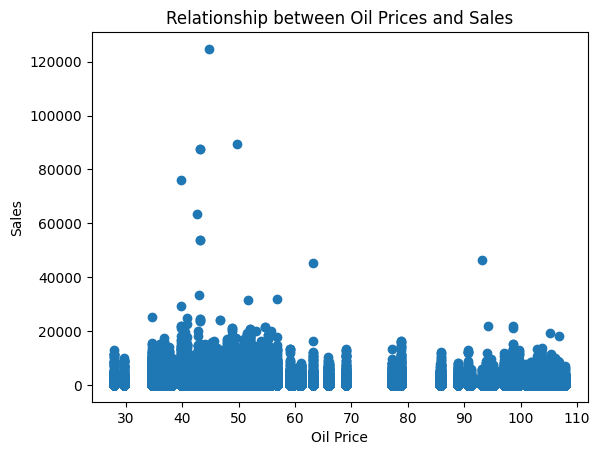

In [66]:
# Plot a scatter plot to visualize the relationship between oil prices and sales
plt.scatter(new_merged_data['dcoilwtico'], new_merged_data['sales'])
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.title('Relationship between Oil Prices and Sales')
plt.show()


<ipython-input-67-b6376eaf4eaf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_1 = new_merged_data.groupby('family').sum()['sales']


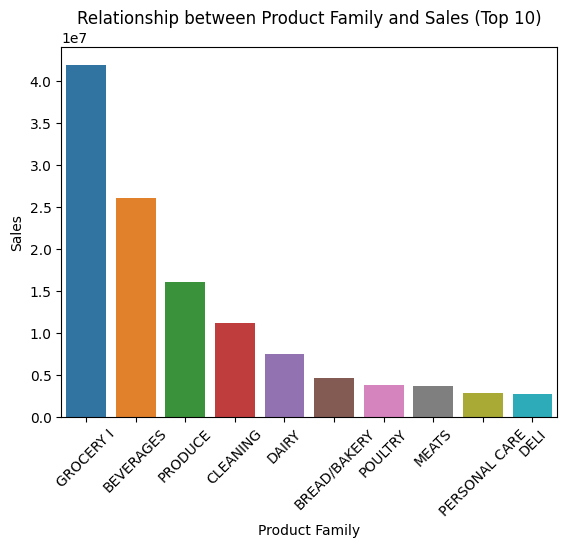

In [67]:

# Group data by product family and sum the sales
grouped_data_1 = new_merged_data.groupby('family').sum()['sales']

# Sort the data by sales
grouped_data_1 = grouped_data_1.sort_values(ascending=False)

# Plot the top 10 product families
sns.barplot(x=grouped_data_1.index[:10], y=grouped_data_1.values[:10])

# Add labels and title
plt.xlabel('Product Family')
plt.ylabel('Sales')
plt.title('Relationship between Product Family and Sales (Top 10)')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


<ipython-input-68-672247b4e305>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  date_group = new_merged_data.groupby("date").sum()


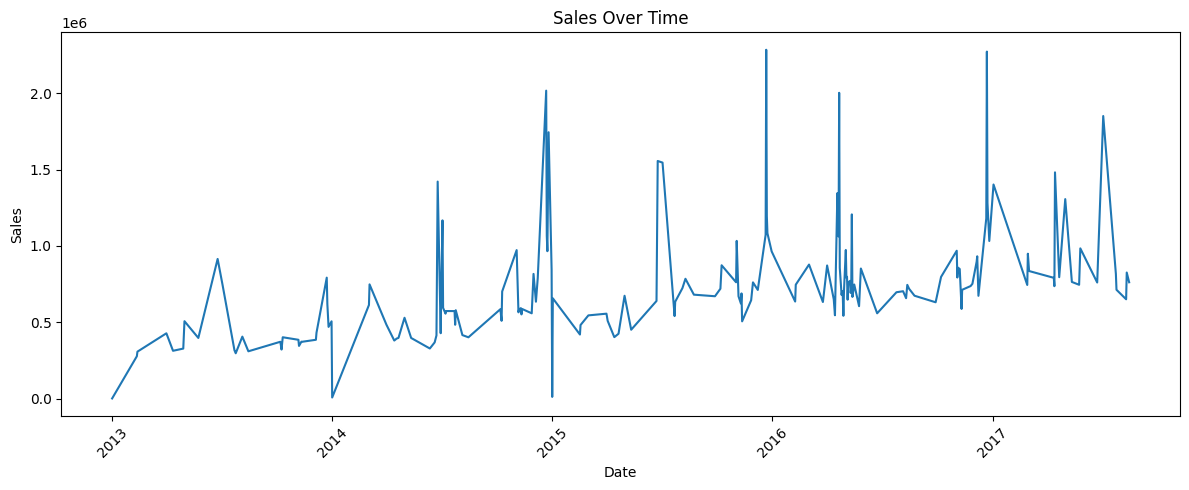

In [68]:

# Group data by date and sum the sales
date_group = new_merged_data.groupby("date").sum()

# Plot the sales over time
plt.figure(figsize=(12,5))
plt.plot(date_group.index, date_group["sales"])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
